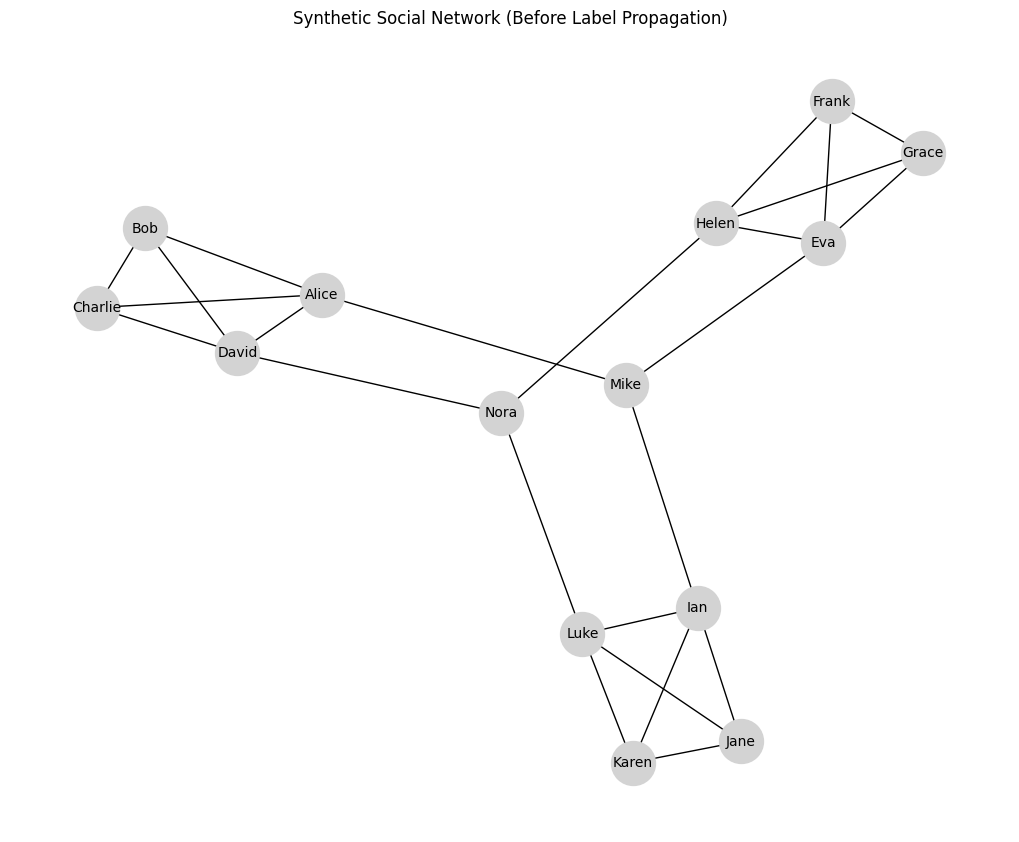

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Initialize graph
G = nx.Graph()

# Adding clusters clearly
sports = ['Alice', 'Bob', 'Charlie', 'David']
music = ['Eva', 'Frank', 'Grace', 'Helen']
study = ['Ian', 'Jane', 'Karen', 'Luke']

# Sports Team edges
G.add_edges_from([(u, v) for u in sports for v in sports if u != v])

# Music Group edges
G.add_edges_from([(u, v) for u in music for v in music if u != v])

# Study Group edges
G.add_edges_from([(u, v) for u in study for v in study if u != v])

# Connectors bridging groups
G.add_edges_from([
    ('Mike', 'Alice'), ('Mike', 'Eva'), ('Mike', 'Ian'),
    ('Nora', 'David'), ('Nora', 'Helen'), ('Nora', 'Luke')
])

# Visualize clearly defined clusters
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1000, font_size=10)
plt.title("Synthetic Social Network (Before Label Propagation)")
plt.show()

In [ ]:
for neighbor in nx.neighbors(G, 'Mike'):
    print(neighbor)

Alice
Eva
Ian


In [ ]:
def label_propagation(G, max_iter=100):
    # Initialize labels
    labels = {node: node for node in G.nodes()}

    for iteration in range(max_iter):
        changed = False
        nodes = list(G.nodes())
        random.shuffle(nodes)  # Random order for fairness

        for node in nodes:
            # Count neighbors' labels
            neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
            if neighbor_labels:
                # Most common label among neighbors
                most_common_label, _ = Counter(neighbor_labels).most_common(1)[0]
                if labels[node] != most_common_label:
                    labels[node] = most_common_label
                    changed = True

        if not changed:
            print(f"Converged after {iteration+1} iterations.")
            break

    return labels

# Run algorithm
final_labels = label_propagation(G)

Converged after 2 iterations.


In [ ]:
from collections import defaultdict

# Group nodes by labels
communities = defaultdict(list)
for node, label in final_labels.items():
    communities[label].append(node)

print("Detected Communities:")
for idx, community in enumerate(communities.values(), 1):
    print(f"Community {idx}: {community}")

Detected Communities:
Community 1: ['Alice', 'Bob', 'Charlie', 'David', 'Mike', 'Nora']
Community 2: ['Eva', 'Frank', 'Grace', 'Helen']
Community 3: ['Ian', 'Jane', 'Karen', 'Luke']


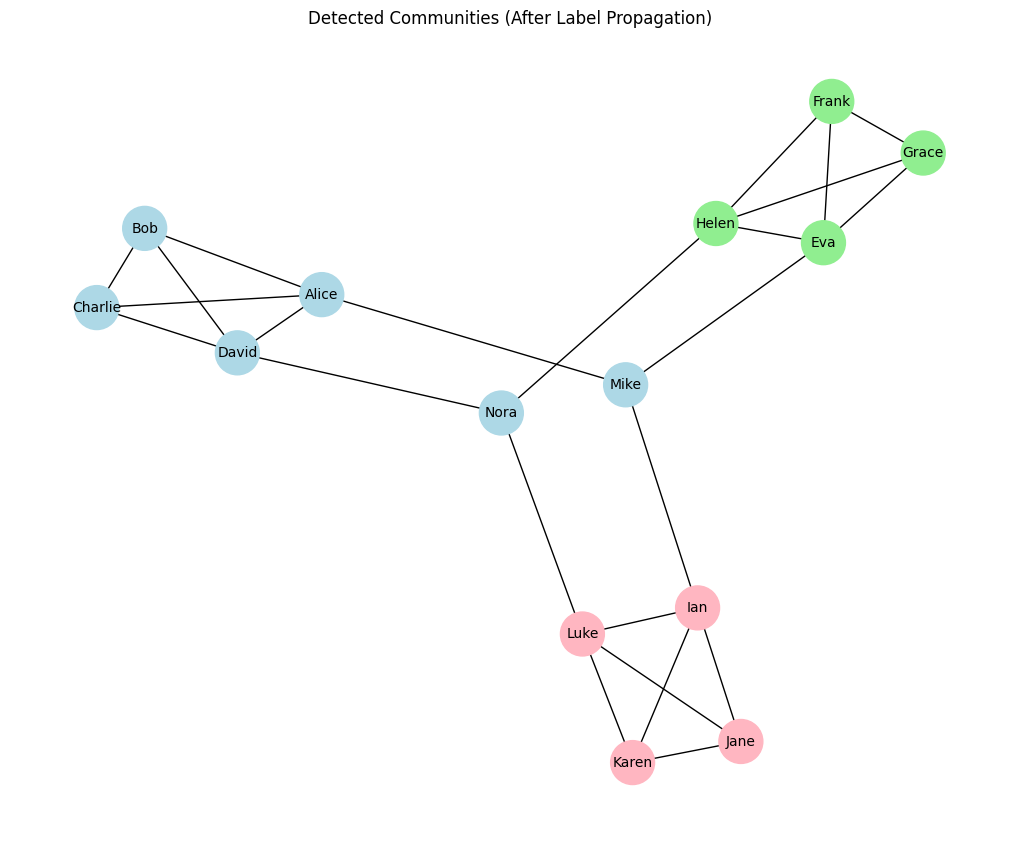

In [ ]:
color_map = ['lightblue', 'lightgreen', 'lightpink', 'orange', 'yellow', 'violet', 'cyan']
node_colors = {}
for idx, community in enumerate(communities.values()):
    for node in community:
        node_colors[node] = color_map[idx % len(color_map)]

# Plot clearly labeled communities
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True,
        node_color=[node_colors[node] for node in G.nodes()],
        node_size=1000, font_size=10)
plt.title("Detected Communities (After Label Propagation)")
plt.show()


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Louvain support
try:
    import community as community_louvain
    louvain_installed = True
except ImportError:
    louvain_installed = False
    print("Warning: 'python-louvain' package not installed. Louvain test will be skipped.")

# Initialize a list to collect results
results = []

# --------------- Test functions ----------------

def test_louvain_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=1.0)
    G.add_edge(3, 4, weight=0.0)  # Zero-weight edge
    G.add_edge(4, 5, weight=1.0)
    partition = community_louvain.best_partition(G, weight='weight')
    return partition

def test_pagerank_zero_weight():
    G = nx.DiGraph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=0.0)
    G.add_edge(3, 1, weight=1.0)
    pr = nx.pagerank(G, weight='weight')
    return pr

def test_betweenness_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(1, 3, weight=5.0)
    G.add_edge(2, 3, weight=0.0)
    bc = nx.betweenness_centrality(G, weight='weight')
    return bc

def test_eigenvector_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=1.0)
    G.add_edge(1, 3, weight=0.0)
    ec = nx.eigenvector_centrality(G, weight='weight')
    return ec

def test_cosine_similarity_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(1, 3, weight=0.0)
    G.add_edge(2, 3, weight=1.0)
    vec_1 = [G[1][2]['weight'], G[1][3]['weight']]
    vec_2 = [G[2][1]['weight'], G[2][3]['weight']]
    sim = 1 - cosine(vec_1, vec_2)
    return sim

def test_dijkstra_zero_weight():
    G = nx.DiGraph()
    G.add_edge(1, 2, weight=5.0)
    G.add_edge(1, 3, weight=1.0)
    G.add_edge(3, 2, weight=0.0)
    path = nx.shortest_path(G, 1, 2, weight='weight')
    length = nx.shortest_path_length(G, 1, 2, weight='weight')
    return (path, length)

# --------------- Running Tests ----------------

def add_result(algorithm, networkx_behavior):
    results.append({
        "Algorithm": algorithm,
        "NetworkX Result": networkx_behavior,
        "Product Result": "",  # Leave blank for now
        "Same/Different": "",  # Leave blank for now
        "Notes": ""            # Leave blank for now
    })

if louvain_installed:
    partition = test_louvain_zero_weight()
    add_result("Louvain (community detection)", f"Partition: {partition}")
else:
    add_result("Louvain (community detection)", "Skipped (louvain package not installed)")

pagerank_scores = test_pagerank_zero_weight()
add_result("PageRank", f"Scores: {pagerank_scores}")

betweenness_scores = test_betweenness_zero_weight()
add_result("Betweenness Centrality", f"Scores: {betweenness_scores}")

eigenvector_scores = test_eigenvector_zero_weight()
add_result("Eigenvector Centrality", f"Scores: {eigenvector_scores}")

cosine_score = test_cosine_similarity_zero_weight()
add_result("Cosine Similarity", f"Score: {cosine_score}")

path, length = test_dijkstra_zero_weight()
add_result("Dijkstra Shortest Path", f"Path: {path}, Length: {length}")

# --------------- Exporting to CSV ----------------

df = pd.DataFrame(results)
df.to_csv("zero_weight_behavior_comparison.csv", index=False)

print("\n✅ Results written to 'zero_weight_behavior_comparison.csv'")
print(df)



✅ Results written to 'zero_weight_behavior_comparison.csv'
                       Algorithm  \
0  Louvain (community detection)   
1                       PageRank   
2         Betweenness Centrality   
3         Eigenvector Centrality   
4              Cosine Similarity   
5         Dijkstra Shortest Path   

                                     NetworkX Result Product Result  \
0          Partition: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}                  
1  Scores: {1: 0.3411716203526378, 2: 0.474411616...                  
2                   Scores: {1: 0.0, 2: 1.5, 3: 0.0}                  
3  Scores: {1: 0.5000000644180599, 2: 0.707106690...                  
4                          Score: 0.7071067811865475                  
5                       Path: [1, 3, 2], Length: 1.0                  

  Same/Different Notes  
0                       
1                       
2                       
3                       
4                       
5                       


In [ ]:
df

,Algorithm,NetworkX Result,Product Result,Same/Different,Notes
0,Louvain (community detection),"Partition: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}",,,
1,PageRank,"Scores: {1: 0.3411716203526378, 2: 0.474411616...",,,
2,Betweenness Centrality,"Scores: {1: 0.0, 2: 1.5, 3: 0.0}",,,
3,Eigenvector Centrality,"Scores: {1: 0.5000000644180599, 2: 0.707106690...",,,
4,Cosine Similarity,Score: 0.7071067811865475,,,
5,Dijkstra Shortest Path,"Path: [1, 3, 2], Length: 1.0",,,


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Louvain support
try:
    import community as community_louvain
    louvain_installed = True
except ImportError:
    louvain_installed = False
    print("Warning: 'python-louvain' package not installed. Louvain test will be skipped.")

# Initialize a list to collect results
results = []

# --------------- Test functions ----------------

def test_louvain_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=1.0)
    G.add_edge(3, 4, weight=0.0)  # Zero-weight edge
    G.add_edge(4, 5, weight=1.0)
    partition = community_louvain.best_partition(G, weight='weight')
    return partition

def test_pagerank_zero_weight():
    G = nx.DiGraph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=0.0)
    G.add_edge(3, 1, weight=1.0)
    pr = nx.pagerank(G, weight='weight')
    return pr

def test_betweenness_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(1, 3, weight=5.0)
    G.add_edge(2, 3, weight=0.0)
    bc = nx.betweenness_centrality(G, weight='weight')
    return bc

def test_eigenvector_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(2, 3, weight=1.0)
    G.add_edge(1, 3, weight=0.0)
    ec = nx.eigenvector_centrality(G, weight='weight')
    return ec

def test_cosine_similarity_zero_weight():
    G = nx.Graph()
    G.add_edge(1, 2, weight=1.0)
    G.add_edge(1, 3, weight=0.0)
    G.add_edge(2, 3, weight=1.0)
    vec_1 = [G[1][2]['weight'], G[1][3]['weight']]
    vec_2 = [G[2][1]['weight'], G[2][3]['weight']]
    sim = 1 - cosine(vec_1, vec_2)
    return sim

def test_dijkstra_zero_weight():
    G = nx.DiGraph()
    G.add_edge(1, 2, weight=5.0)
    G.add_edge(1, 3, weight=1.0)
    G.add_edge(3, 2, weight=0.0)
    path = nx.shortest_path(G, 1, 2, weight='weight')
    length = nx.shortest_path_length(G, 1, 2, weight='weight')
    return (path, length)

# --------------- Running Tests ----------------

def add_result(algorithm, networkx_behavior):
    results.append({
        "Algorithm": algorithm,
        "NetworkX Result": networkx_behavior,
        "Product Result": "",  # Leave blank for now
        "Same/Different": "",  # Leave blank for now
        "Notes": ""            # Leave blank for now
    })

if louvain_installed:
    partition = test_louvain_zero_weight()
    add_result("Louvain (community detection)", f"Partition: {partition}")
else:
    add_result("Louvain (community detection)", "Skipped (louvain package not installed)")

pagerank_scores = test_pagerank_zero_weight()
add_result("PageRank", f"Scores: {pagerank_scores}")

betweenness_scores = test_betweenness_zero_weight()
add_result("Betweenness Centrality", f"Scores: {betweenness_scores}")

eigenvector_scores = test_eigenvector_zero_weight()
add_result("Eigenvector Centrality", f"Scores: {eigenvector_scores}")

cosine_score = test_cosine_similarity_zero_weight()
add_result("Cosine Similarity", f"Score: {cosine_score}")

path, length = test_dijkstra_zero_weight()
add_result("Dijkstra Shortest Path", f"Path: {path}, Length: {length}")

# --------------- Exporting to CSV ----------------

df = pd.DataFrame(results)
df.to_csv("zero_weight_behavior_comparison.csv", index=False)

print("\n✅ Results written to 'zero_weight_behavior_comparison.csv'")
print(df)



✅ Results written to 'zero_weight_behavior_comparison.csv'
                       Algorithm  \
0  Louvain (community detection)   
1                       PageRank   
2         Betweenness Centrality   
3         Eigenvector Centrality   
4              Cosine Similarity   
5         Dijkstra Shortest Path   

                                     NetworkX Result Product Result  \
0          Partition: {1: 1, 2: 1, 3: 1, 4: 0, 5: 0}                  
1  Scores: {1: 0.3411716203526378, 2: 0.474411616...                  
2                   Scores: {1: 0.0, 2: 1.5, 3: 0.0}                  
3  Scores: {1: 0.5000000644180599, 2: 0.707106690...                  
4                          Score: 0.7071067811865475                  
5                       Path: [1, 3, 2], Length: 1.0                  

  Same/Different Notes  
0                       
1                       
2                       
3                       
4                       
5                       
